In [17]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [18]:
# Adjusting the loading process to handle potential formatting issues
def clean_and_load_data(file_path):
    # Read the file content
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    # Clean and prepare data
    cleaned_data = []
    for line in lines:
        # Strip trailing newline and split by tabs
        split_line = line.strip().split('\t')
        # Remove any empty strings
        cleaned_values = [float(value) for value in split_line if value]
        cleaned_data.append(cleaned_values)
    
    return np.array(cleaned_data)

[1.00000000e-03 1.77827941e-03 3.16227766e-03 5.62341325e-03
 1.00000000e-02 1.77827941e-02 3.16227766e-02 5.62341325e-02
 1.00000000e-01 1.77827941e-01 3.16227766e-01 5.62341325e-01
 1.00000000e+00 1.77827941e+00 3.16227766e+00 5.62341325e+00
 1.00000000e+01 1.77827941e+01 3.16227766e+01 5.62341325e+01
 1.00000000e+02]
21


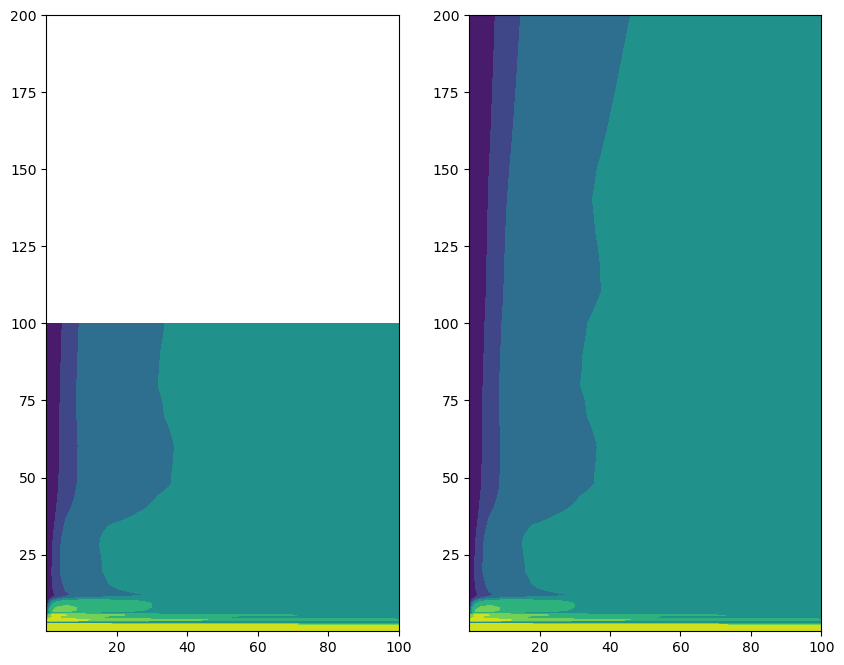

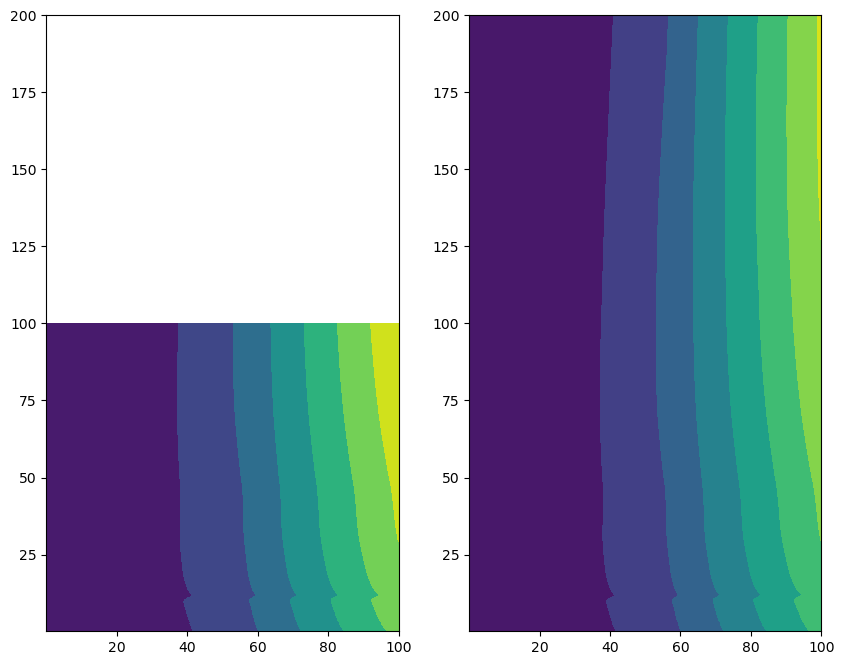

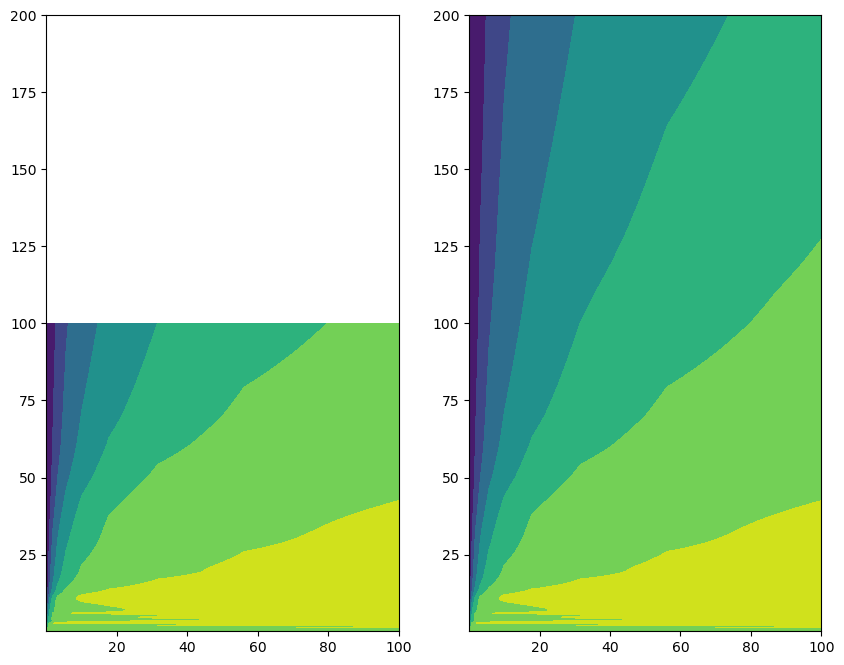

In [27]:
new_data = glob('*.dat')
new_data.sort()

old_data = glob('old/*.dat')
old_data.sort()

lam_old = 10**(np.arange(-1,2.01,0.01))
NLAMBDA = 16000.
LAMBDA_HIGH = 200*1.e-6
LAMBDA_LOW = 0.1*1.e-6
dlambda = (np.log10(200*1.e-6)-np.log10(0.1*1.e-6))/(NLAMBDA-1)
lam_new = 10**(np.arange(np.log10(LAMBDA_LOW), np.log10(LAMBDA_HIGH)+dlambda*0.1, dlambda))*1.e+6

size = 10**(np.arange(-3, 2.01, 0.25))
print(size)
print(len(size))
for idata in np.arange(3):  # albedo, cross, geo

    data1 = clean_and_load_data(old_data[idata])
    data2 = clean_and_load_data(new_data[idata])                            


#  the first column is wavelengths and the rest are data values
    lam_old = data1[:,0]  # First column as wavelengths
    lam_new = data2[:,0]
    var_old = data1[:,1:]
    var_new = data2[:,1:]

    fig = plt.figure(figsize=(10, 8))
# Create the heatmap
    ax = fig.add_subplot(121)
    ax.contourf(size, lam_old, var_old, cmap='viridis')
    ax.set_ylim([0.1,200])
    ax = fig.add_subplot(122)
    ax.contourf(size, lam_new, var_new, cmap='viridis')
    ax.set_ylim([0.1,200])
    plt.show()




In [25]:
var_old.shape

(301, 21)

In [4]:
new_data

['Albedo_water_110123.dat', 'Cross_water_110123.dat', 'Geo_water_110123.dat']

In [5]:
old_data

['old/Albedo_water_110123.dat',
 'old/Cross_water_110123.dat',
 'old/Geo_water_110123.dat']